# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf

2024-10-19 01:02:09.924026: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 01:02:09.961559: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 01:02:10.023113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 01:02:10.087399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 01:02:10.110080: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-19 01:02:10.208020: I tensorflow/core/platform/cpu_feature_gu

In [2]:
df=pd.read_parquet("data/fhvhv_tripdata_2023-01.parquet")

In [3]:
#fs = np.array_split(df, 2)
#df = dfs[0]

In [4]:
df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-01-01 00:18:06,2023-01-01 00:19:24,2023-01-01 00:19:38,2023-01-01 00:48:07,48,68,0.94,...,2.30,2.75,0.0,5.22,27.83,N,N,,N,N
1,HV0003,B03404,B03404,2023-01-01 00:48:42,2023-01-01 00:56:20,2023-01-01 00:58:39,2023-01-01 01:33:08,246,163,2.78,...,5.34,2.75,0.0,0.00,50.15,N,N,,N,N
2,HV0003,B03404,B03404,2023-01-01 00:15:35,2023-01-01 00:20:14,2023-01-01 00:20:27,2023-01-01 00:37:54,9,129,8.81,...,2.16,0.00,0.0,0.00,20.22,N,N,,N,N
3,HV0003,B03404,B03404,2023-01-01 00:35:24,2023-01-01 00:39:30,2023-01-01 00:41:05,2023-01-01 00:48:16,129,129,0.67,...,1.22,0.00,0.0,0.00,7.90,N,N,,N,N
4,HV0003,B03404,B03404,2023-01-01 00:43:15,2023-01-01 00:51:10,2023-01-01 00:52:47,2023-01-01 01:04:51,129,92,4.38,...,1.82,0.00,0.0,0.00,16.48,N,N,,N,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18479031 entries, 0 to 18479030
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

# Data Cleanup / Preprocessing

In [6]:
# Remove Null Values
df.dropna(inplace=True)

In [7]:
# Drop unused columns
df.drop(['hvfhs_license_num','dispatching_base_num','originating_base_num','base_passenger_fare','tolls','bcf','sales_tax','congestion_surcharge','airport_fee','tips','driver_pay','shared_match_flag','shared_request_flag','access_a_ride_flag','wav_match_flag','wav_request_flag'],axis=1, inplace=True)

In [8]:
# Get time of day in terms of percentage
df['start_time'] = (df['request_datetime'].dt.hour + (df['request_datetime'].dt.minute / 60)) / 24

# Convert time of day to cyclic features using sine and cosine
df['time_sin'] = np.sin(2 * np.pi * df['start_time'])
df['time_cos'] = np.cos(2 * np.pi * df['start_time'])

In [9]:
# Also consider cyclic day of the week
df['day_sin'] = np.sin(2 * np.pi * df['request_datetime'].dt.dayofweek / 7)
df['day_cos'] = np.cos(2 * np.pi * df['request_datetime'].dt.dayofweek / 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13587039 entries, 0 to 18479030
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   request_datetime   datetime64[us]
 1   on_scene_datetime  datetime64[us]
 2   pickup_datetime    datetime64[us]
 3   dropoff_datetime   datetime64[us]
 4   PULocationID       int64         
 5   DOLocationID       int64         
 6   trip_miles         float64       
 7   trip_time          int64         
 8   start_time         float64       
 9   time_sin           float64       
 10  time_cos           float64       
 11  day_sin            float64       
 12  day_cos            float64       
dtypes: datetime64[us](4), float64(6), int64(3)
memory usage: 1.4 GB


In [11]:
df.head()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,start_time,time_sin,time_cos,day_sin,day_cos
0,2023-01-01 00:18:06,2023-01-01 00:19:24,2023-01-01 00:19:38,2023-01-01 00:48:07,48,68,0.94,1709,0.012500,0.078459,0.996917,-0.781831,0.62349
1,2023-01-01 00:48:42,2023-01-01 00:56:20,2023-01-01 00:58:39,2023-01-01 01:33:08,246,163,2.78,2069,0.033333,0.207912,0.978148,-0.781831,0.62349
2,2023-01-01 00:15:35,2023-01-01 00:20:14,2023-01-01 00:20:27,2023-01-01 00:37:54,9,129,8.81,1047,0.010417,0.065403,0.997859,-0.781831,0.62349
3,2023-01-01 00:35:24,2023-01-01 00:39:30,2023-01-01 00:41:05,2023-01-01 00:48:16,129,129,0.67,431,0.024306,0.152123,0.988362,-0.781831,0.62349
4,2023-01-01 00:43:15,2023-01-01 00:51:10,2023-01-01 00:52:47,2023-01-01 01:04:51,129,92,4.38,724,0.029861,0.186524,0.982450,-0.781831,0.62349


# Visualization

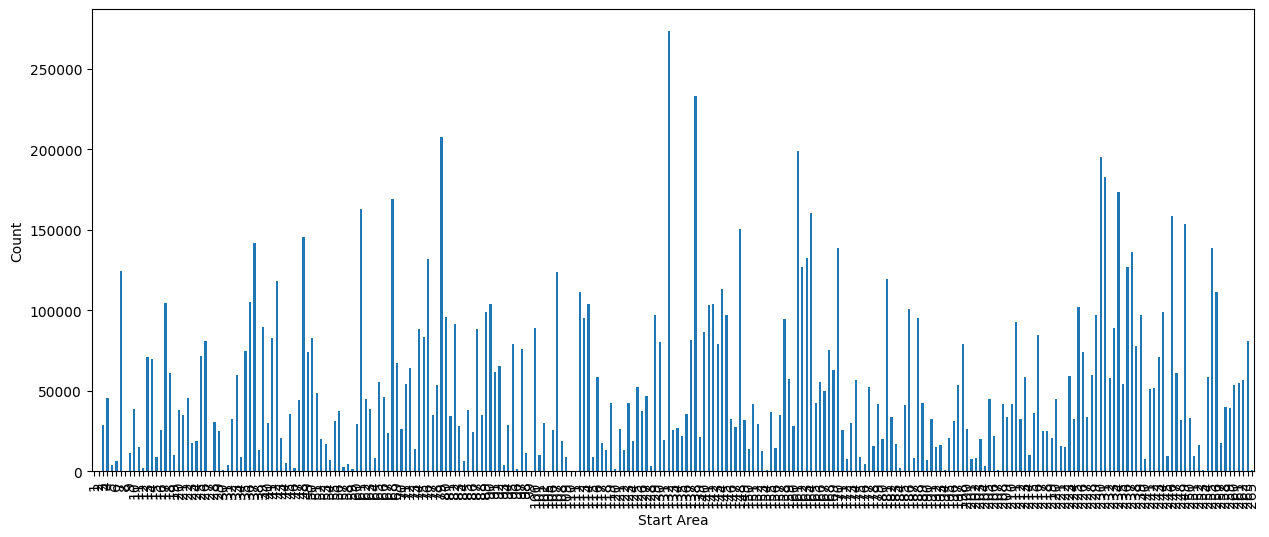

In [12]:
plt.figure(figsize=(15,6))
df['PULocationID'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.xlabel("Start Area")
plt.ylabel("Count")
plt.show()

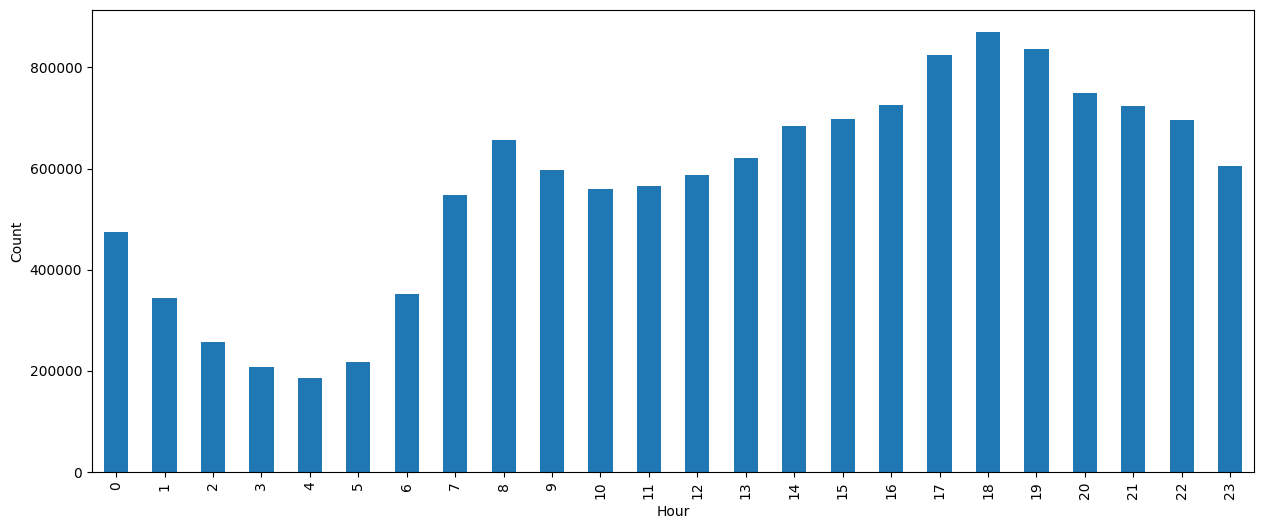

In [13]:
plt.figure(figsize=(15,6))
df['request_datetime'].dt.hour.value_counts(sort=False).sort_index().plot(kind='bar')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

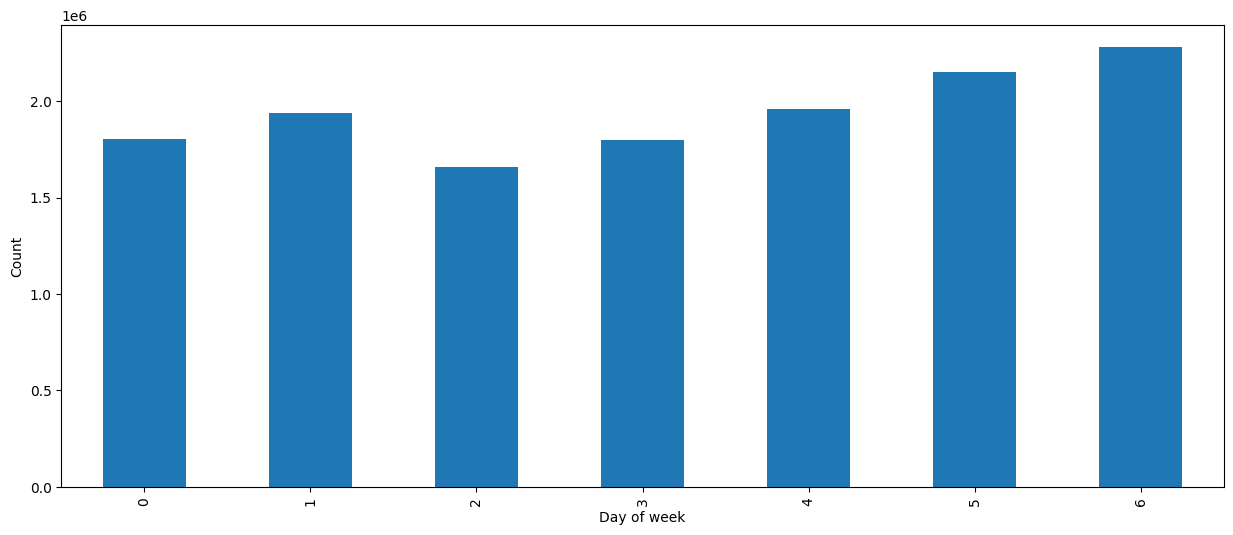

In [14]:
plt.figure(figsize=(15,6))
df['request_datetime'].dt.dayofweek.value_counts(sort=False).sort_index().plot(kind='bar')
#df['request_datetime'].dt.day_name().value_counts(sort=False).plot(kind='bar')
plt.xlabel("Day of week")
plt.ylabel("Count")
plt.show()

# Predicting Start Points

In [15]:
features = ['time_sin','time_cos','day_sin','day_cos']
targets = ['PULocationID']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)

In [18]:
# Unloading the dataframe to save memory
df = []

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [21]:
# Flattening the df from (x,1) to (x,)
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

In [22]:
# Conversion into numpy array for passing it into to_categorical function
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

In [23]:
y_test = tf.keras.utils.to_categorical(y_test, 266)

In [24]:
y_train = tf.keras.utils.to_categorical(y_train, 266)

1 am thoughts:

I don't think the concept of entering the time and predicting the place where the ride will be from is a good idea

Instead I think I should have an average of a small time period like 15 minutes and count the demand of each area
then compare the model's accuracy with the top x% of demand of that area

In [31]:
model = tf.keras.Sequential()

# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]))

# Hidden layers
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Output layer (assuming 'n' distinct starting points to predict)
model.add(tf.keras.layers.Dense(266, activation='softmax'))

/home/lenovo/Documents/Major Project/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 266)            │        34,314 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,490 (267.54 KB)

 Trainable params: 68,490 (267.54 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=100, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)
model.save('model.keras')

Epoch 1/1000
108697/108697 ━━━━━━━━━━━━━━━━━━━━ 427s 4ms/step - accuracy: 0.0259 - loss: 5.1410 - val_accuracy: 0.0265 - val_loss: 5.1317
Epoch 2/1000
108697/108697 ━━━━━━━━━━━━━━━━━━━━ 398s 4ms/step - accuracy: 0.0265 - loss: 5.1327 - val_accuracy: 0.0268 - val_loss: 5.1310
Epoch 3/1000
108697/108697 ━━━━━━━━━━━━━━━━━━━━ 397s 4ms/step - accuracy: 0.0266 - loss: 5.1325 - val_accuracy: 0.0267 - val_loss: 5.1309
Epoch 4/1000
108697/108697 ━━━━━━━━━━━━━━━━━━━━ 399s 4ms/step - accuracy: 0.0265 - loss: 5.1325 - val_accuracy: 0.0268 - val_loss: 5.1307
Epoch 5/1000
108697/108697 ━━━━━━━━━━━━━━━━━━━━ 402s 4ms/step - accuracy: 0.0265 - loss: 5.1324 - val_accuracy: 0.0265 - val_loss: 5.1316
Epoch 6/1000
108697/108697 ━━━━━━━━━━━━━━━━━━━━ 402s 4ms/step - accuracy: 0.0265 - loss: 5.1327 - val_accuracy: 0.0266 - val_loss: 5.1318
Epoch 7/1000
108697/108697 ━━━━━━━━━━━━━━━━━━━━ 402s 4ms/step - accuracy: 0.0265 - loss: 5.1326 - val_accuracy: 0.0267 - val_loss: 5.1326
Epoch 8/1000
108697/108697 ━━━━━━━

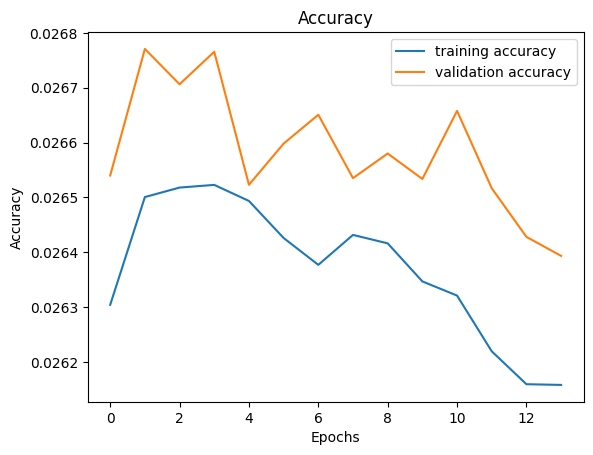

In [34]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
model = tf.keras.models.load_model('model.keras')

In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.130685329437256
Test accuracy: 0.026765579357743263
